<a href="https://colab.research.google.com/github/thiagolimaop/vehicle_pricing/blob/main/Modelo_de_regress%C3%A3o_Precifica%C3%A7%C3%A3o_de_Ve%C3%ADculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo preditivo de precificação de carros

## 1. Definição do Problema

Uma revendedora de veículos se instalou em uma cidade norte americana e decidiu se utilizar de dados para realizar automatizar o processo de precificação, uma vez que avaliações manuais levam mais tempo e são de certa forma subjetivas. Esta seria uma forma de a revendedora criar criar ajustes de preços com nas condições atuais do mercado.

Eles contrataram uma empresa de consultoria automobilista para entender os fatores que influenciam nos preços.

Este projeto tentará identificar:

- Quais variáveis são significantes na predição dos preços dos carros?
- Quão bem essas variáveis descrevem o preço dos carros?

Além disso iremos criar um modelo de regressão linear para predizer o preço com base nas variáveis fornecidas. Vamos levar em consideração que o preço esta dolar.


## 2. Carga de Dados

Vamos iniciar importando as bibliotecas e carregando o arquivo .csv através do pacote Pandas.

In [68]:
import warnings
warnings.filterwarnings('ignore')

# Importação das bibliotecas usadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
import matplotlib as mpl
from abc import ABC, abstractmethod
from sklearn.feature_selection import SelectKBest, f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.metrics import r2_score # métrica para calcular o R²

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thiagolimaop/vehicle_pricing/main/car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## 3. Análise de Dados

### 3.1 Análise descritiva

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [3]:
# Mostra as dimensões do dataset
df.shape

(19237, 18)

In [4]:
# Mostra as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
# Mostra as 10 primeiras linhas do dataset
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [6]:
# Mostra as 10 últimas linhas do dataset
df.tail(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19227,45769427,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19228,45773726,706,1850,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874 km,6.0,Automatic,Rear,04-May,Left wheel,Black,12
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [7]:
# Verifica o tipo de dataset de cada atributo
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

### 3.2 Transformação e Limpeza

Nesse passo vamos realizar algumas transformações e limpar alguns dados fora da curva.

Começado pelo atributo **Levy** referente a taxas de importação/exportação dos carros, que deveria ser um atributo inteiro ou float, mas devido as '-' foi categorizado como string. Vamos consertar isso.

In [8]:
df['Levy'] = df['Levy'].replace('-', 0)
df['Levy'] = df['Levy'].astype(float)

# Mostra as 5 primeiras linhas do dataset
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


O atributo **Mileage** referente a kilometragem rodada poderia ser um atributo inteiro também! Vamos remover o 'km' das colunas e converter o atributo.

In [9]:
df['Mileage'] = df['Mileage'].str.replace(' km', '')
df['Mileage'] = df['Mileage'].astype(int)

# Mostra as 5 primeiras linhas do dataset
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


O Atributo **Engine volume** deveria ser um float porém esta categorizado como uma string. Vamos ver os valores que ele apresenta e realizar o devido tratamento.

In [10]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

A palavra **Turbo** é usada para enfatizar a potencia do motor. Logo podemos criar um atributo extra para dizer se é **Turbo** ou não.

In [11]:
df['Is Turbo'] = df['Engine volume'].str.contains('Turbo')
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '')
df['Engine volume'] = df['Engine volume'].astype(float)

# Mostra as 10 primeiras linhas do dataset
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,45774419,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,04-May,Left wheel,White,4,False
6,45656768,1803,761.0,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,04-May,Left wheel,White,12,False
7,45816158,549,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,04-May,Left wheel,Grey,12,False
8,45641395,1098,394.0,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,04-May,Left wheel,Black,12,False
9,45756839,26657,0.0,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False


In [12]:
df[df['Is Turbo']].head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
23,45814106,7840,0.0,FORD,Transit,2001,Microbus,No,Diesel,2.0,230000,4.0,Manual,Front,02-Mar,Left wheel,White,0,True
25,45782859,20385,0.0,MERCEDES-BENZ,E 220,2006,Sedan,Yes,Diesel,2.2,210000,4.0,Tiptronic,Rear,04-May,Left wheel,Black,8,True
30,44944581,15681,1288.0,MERCEDES-BENZ,Vito,2007,Goods wagon,No,Diesel,2.0,180000,6.0,Manual,Rear,04-May,Left wheel,White,4,True
34,45542380,24462,0.0,JEEP,Grand Cherokee,2007,Jeep,Yes,Diesel,3.0,250000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,10,True
42,45667253,20165,650.0,VOLKSWAGEN,Jetta,2016,Sedan,Yes,Petrol,1.4,11200,4.0,Tiptronic,Front,04-May,Left wheel,Black,8,True


In [13]:
# Mostra as resumo estatístico descritivo do dataset
df.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,632.528669,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,9.365914e+05,1.905813e+05,567.721688,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,0.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,642.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


Analizando a variável dependente preço vemos que o valor mínimo é de 1 dolar, o que é bem suspeito. Também vemos carros no valor máximo de aproximadamente 27 Milhões. O desvio padrão tem 5 casas decimais. Não dá pra usar valores de média nesses casos para realizar as análises.

Vamos ver mais de perto o modelo de 26 milhões de dolares.

In [14]:
df[df['Price'] > 26000000]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
16983,45812886,26307500,0.0,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,02-Mar,Left wheel,Blue,0,False


 Embora a Opel seja conhecida por seus modelos de qualidade e design atraente, ela se posiciona no segmento de mercado de veículos de passeio convencionais, oferecendo uma gama de modelos acessíveis para o público em geral. Logo, este modelo da **Opel** de 26 milhões deve ser considerado um erro de digitação, principalmente com as caracteristicas que ele apresenta! Portanto iremos excluir este registro do dataset!


In [15]:
df = df.drop(df[df['ID'] == 45812886].index)
df[df['Price'] > 26000000]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo


Outro fator importante é que, nos EUA dificilmente se encontra um carro que sai do lugar, isto é, que possui uma utilizada prática, por menos de 500 dolares. Então iremos excluir do dataset qualquer carro com valores abaixo de 500 dolares.

In [16]:
print('Quantidade de carros abaixo de $500,00: ', df[df['Price'] < 500].shape[0])
df = df[df['Price'] >= 500]

Quantidade de carros abaixo de $500,00:  1663


A indústria automotiva dificilmente se utiliza de mais do que 6 cilindradas do motor. Logo, é bem incomum ver o valor máximo de 20 na coluna **Engine volume**. Vamos ver os modelo em questão com mais de 6 cilindradas de motor.

In [17]:
df[df['Engine volume'] > 6]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
1086,45813007,1019,1935.0,DODGE,RAM,2014,Pickup,Yes,Diesel,6.7,367053,6.0,Automatic,Front,04-May,Left wheel,White,12,False
1125,45757249,9565,2410.0,CHEVROLET,Camaro,2010,Coupe,Yes,Petrol,6.2,217786,8.0,Automatic,Rear,02-Mar,Left wheel,Blue,12,False
1225,45795524,627220,0.0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3,0,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,True
1314,45773855,35752,3156.0,GMC,Yukon,2019,Sedan,Yes,Petrol,6.2,11325,8.0,Automatic,Front,04-May,Left wheel,White,12,False
2357,45803214,10036,5603.0,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,20.0,333686,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False
2922,45788165,109764,0.0,MERCEDES-BENZ,C 63 AMG,2011,Sedan,Yes,Petrol,6.3,73000,8.0,Tiptronic,Rear,02-Mar,Left wheel,Red,10,True
2965,45808991,83251,2578.0,CHEVROLET,Camaro,2016,Cabriolet,Yes,Petrol,6.2,81142,4.0,Automatic,Front,04-May,Left wheel,Black,4,False
3677,45806412,19444,1807.0,CADILLAC,Escalade,2012,Jeep,Yes,Petrol,6.2,137210,8.0,Automatic,Rear,04-May,Left wheel,Black,12,False
4722,45813777,175622,2819.0,BENTLEY,Mulsanne,2016,Sedan,Yes,Petrol,6.8,6189,8.0,Automatic,Rear,04-May,Left wheel,Black,12,False
5367,45785703,7840,5877.0,MERCEDES-BENZ,CLK 430,2005,Cabriolet,No,Petrol,7.3,156470,12.0,Automatic,Rear,04-May,Left wheel,Black,12,False


Os valores das cilindradas do motor foram verificados para uma boa parte dos veículos acima, e constaram como verdadeiras, exceto para o modelo **Hyunday Sonata**, apresentando 20.0 de cilindrada do motor. Foi verificado que esse modelo apresenta 2.4 de de cilindrada do motor. Vamos sobrescrever este valor.

In [18]:
df.at[17777, 'Engine volume'] = 2.4
df.at[2357, 'Engine volume'] = 2.4
df.loc[2357]

ID                    45803214
Price                    10036
Levy                    5603.0
Manufacturer           HYUNDAI
Model                   Sonata
Prod. year                2014
Category                 Sedan
Leather interior           Yes
Fuel type                  LPG
Engine volume              2.4
Mileage                 333686
Cylinders                  4.0
Gear box type        Automatic
Drive wheels             Front
Doors                   04-May
Wheel               Left wheel
Color                   Silver
Airbags                      4
Is Turbo                 False
Name: 2357, dtype: object

Também podemos excluir a varíavel ID que é única para cada registro e não fará diferença nas análises e na construção do modelo.

In [19]:
df = df.drop('ID', axis=1)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False


### 3.3 Análise Exploratória

Vamos entender mais sobre as correlações e distribuições das variáveis independentes em relação a variável dependente.

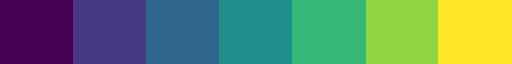

['#440154', '#443983', '#31688e', '#21918c', '#35b779', '#90d743', '#fde725']

In [20]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
# coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 7) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(7)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

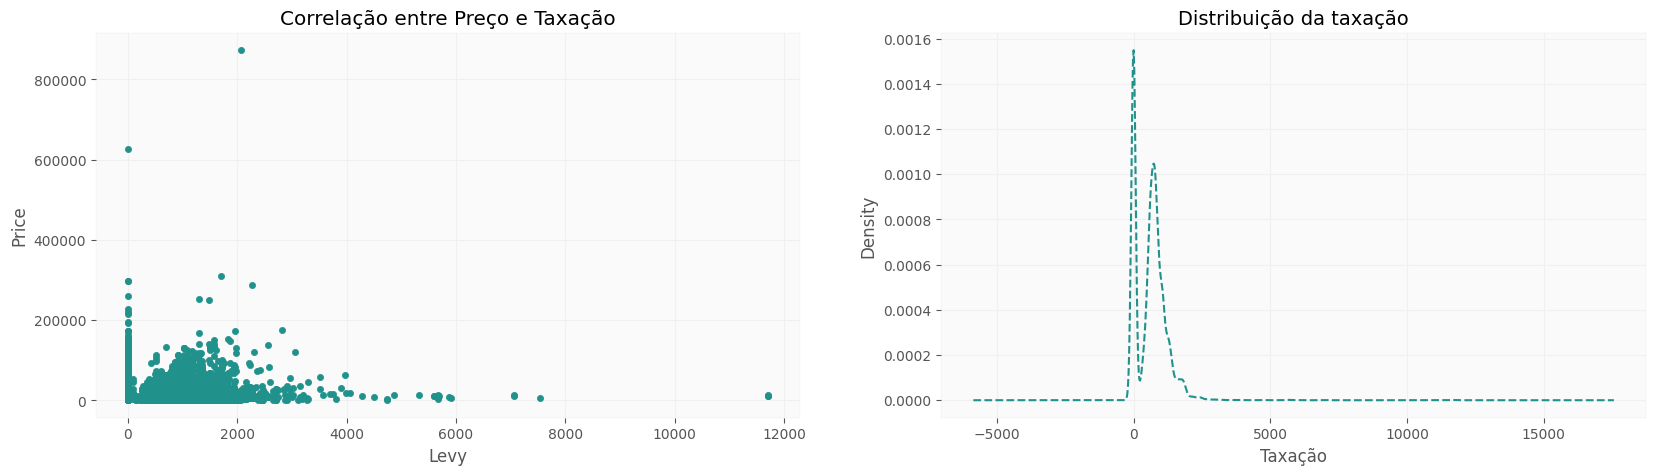

In [21]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df.plot.scatter(x='Levy', y='Price', ax=ax[0], color=coresViridis[3])
ax[0].set_title('Correlação entre Preço e Taxação')

df['Levy'].plot.kde(ls='--', color=coresViridis[3], ax=ax[1])
ax[1].set_xlabel('Taxação', fontsize=12)
ax[1].set_title('Distribuição da taxação', fontsize=14)

plt.show()

A maior parte dos veículos parece ter taxação de importação/exportação entre 0 e 2000 dólares. Porém não é possível tirar uma conclusão muito assertiva sobre o preço, uma vez que a correlação parece ser fraca, não demonstrando nenhuma tendência clara do preço em relação à esse atributo.

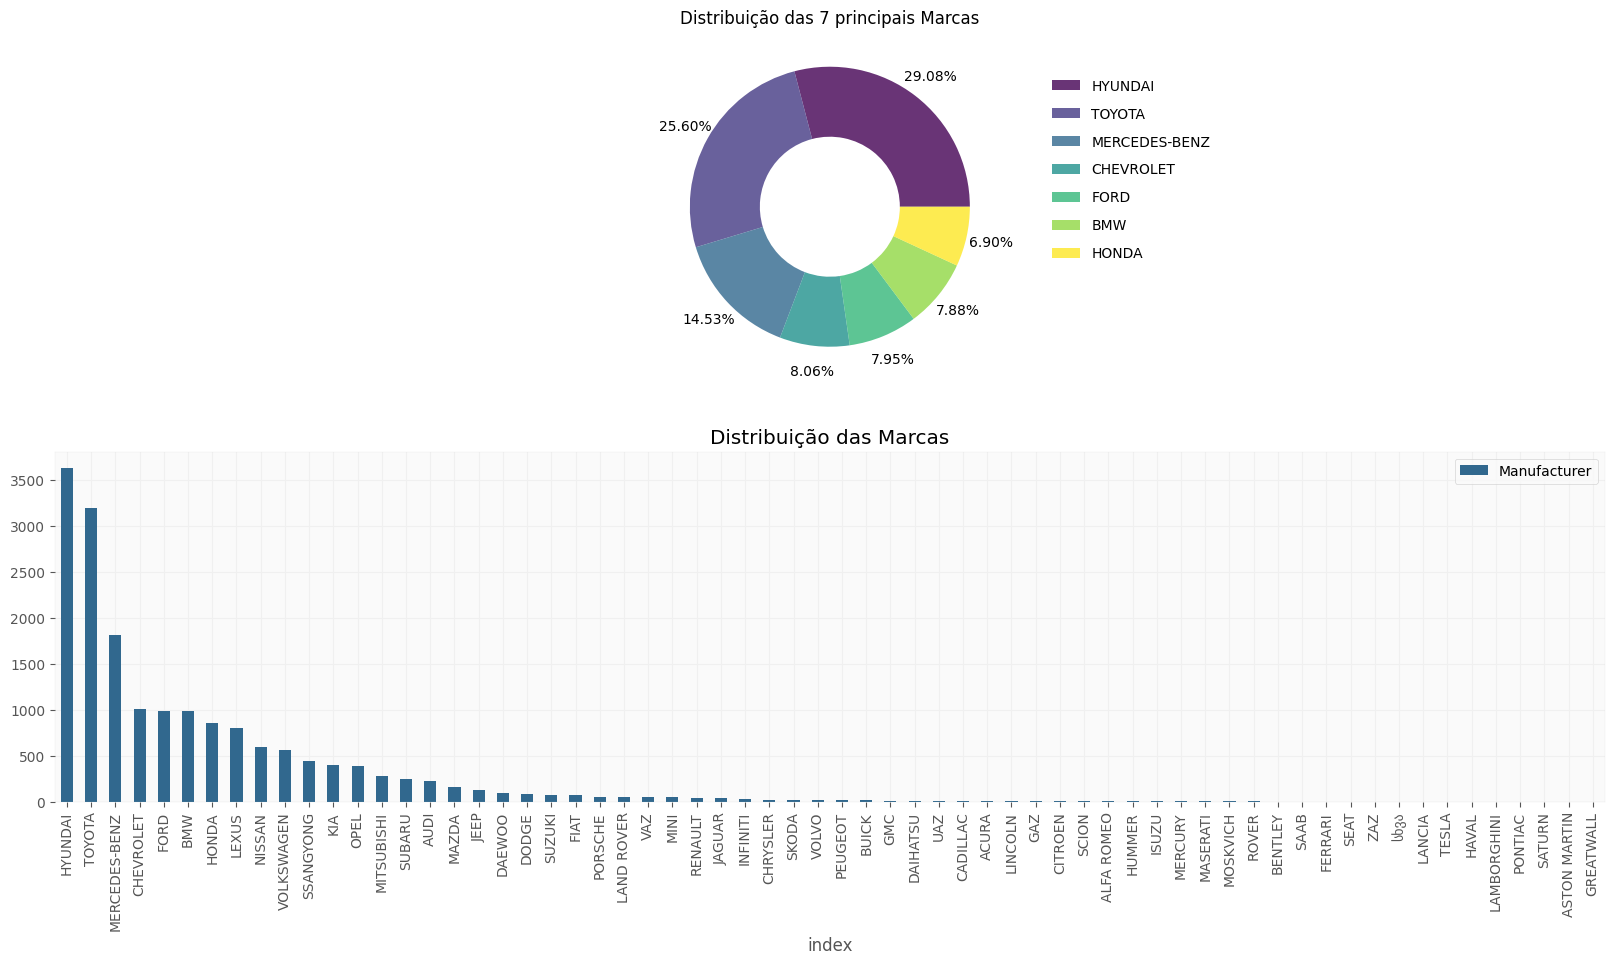

In [22]:
fig, ax = plt.subplots(2, 1,  figsize=(20, 10))

df_chart = df['Manufacturer'].value_counts()
ax[0].pie(df_chart[0:7], autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição das 7 principais Marcas', fontsize=12)

df_chart = df_chart.reset_index()
df_chart.plot.bar(x='index', y='Manufacturer', rot=90, ax=ax[1], color=coresViridis[2])
ax[1].set_title('Distribuição das Marcas')

plt.show()

Existem muitas marcas com uma representação muito baixa para realizar a modelagem estatística. Logo, temos que restringir as marcas que irão compor o modelo para facilitar o aprendizado e assim fazer com que o modelo possa generalizar na predição. Vamos usar a marca FIAT para testar.

In [23]:
df_chart[df_chart['index'] == 'FIAT']

,index,Manufacturer
21,FIAT,72


Podemos traçar um limiar com marcas que tenham uma representação inferior a 72 registros.

In [24]:
marcas = list(df_chart[df_chart['Manufacturer'] > 71]['index'])

df = df[df['Manufacturer'].isin(marcas)]

Vamos estudar melhor o atributo Modelo.

In [25]:
# Exibir a quantidade de modelos do dataset
df['Model'].nunique()

1356

In [26]:
# Vamos realizar uma contagem de ocorrências por modelo
models = df['Model'].value_counts().to_frame().reset_index()
models.head(120)

,index,Model
0,Sonata,999
1,Prius,911
2,Elantra,883
3,Camry,792
4,Santa FE,528
...,...,...
115,S 550,21
116,Camry SE,21
117,X-Terra,21
118,Sorento,21


A quantidade de modelos representa uma quantidade de categorias bem elevada. Isso significa que ao transformar essas categorias pelo One-hot encoding, teriamos aproximadamente 1356 novas colunas o que pode aumentar significativamente a dimensionalidade do nosso dataset. Para isso iremos utilizar a tecnica da miscelânea. Desta forma iremos pegar todas as categorias que possuem menos de 28 ocorrências e agrupa-las em uma única categoria chamada de **Outros**.

In [27]:
models_list = models[models['Model'] < 28]['index']
condition = df['Model'].isin(models_list)
df.loc[condition, 'Model'] = 'Outros'

In [28]:
df[df['Model'] == 'Outros']

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
1,16621,1018.0,CHEVROLET,Outros,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
36,51746,1077.0,TOYOTA,Outros,2019,Jeep,No,Petrol,2.0,10200,4.0,Tiptronic,Front,04-May,Left wheel,Red,12,False
49,17249,0.0,FORD,Outros,2008,Jeep,No,Hybrid,2.3,147000,4.0,Variator,4x4,04-May,Left wheel,White,8,False
54,38500,639.0,AUDI,Outros,2014,Jeep,Yes,Petrol,2.0,87000,1.0,Tiptronic,4x4,04-May,Left wheel,White,12,False
59,23521,781.0,CHEVROLET,Outros,2018,Sedan,No,Petrol,1.4,22000,4.0,Automatic,Front,04-May,Left wheel,Red,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19217,26017,1624.0,LEXUS,Outros,2009,Sedan,Yes,Petrol,3.5,132700,4.0,Automatic,Front,04-May,Left wheel,White,4,False
19223,8781,0.0,DODGE,Outros,2008,Hatchback,No,Petrol,2.4,0,4.0,Automatic,Front,04-May,Left wheel,Blue,4,False
19224,19130,0.0,KIA,Outros,2014,Sedan,Yes,Petrol,2.4,35800,4.0,Automatic,Front,04-May,Left wheel,Black,12,False
19226,7840,0.0,NISSAN,Outros,2003,Sedan,Yes,Petrol,3.0,220000,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0,False


Vamos construir um gráfico de dispersão para entender melhor a correlação entre a preço e ano de produção.

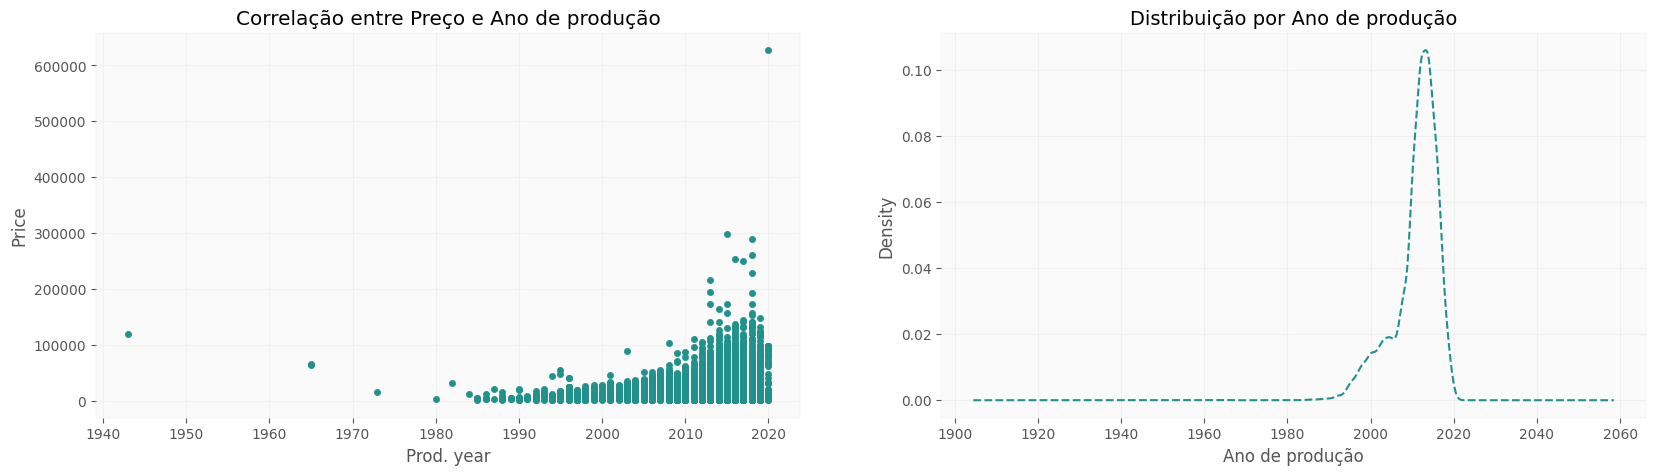

In [29]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df.plot.scatter(x='Prod. year', y='Price', ax=ax[0], color=coresViridis[3])
ax[0].set_title('Correlação entre Preço e Ano de produção')

df['Prod. year'].plot.kde(ls='--', color=coresViridis[3], ax=ax[1])
ax[1].set_xlabel('Ano de produção', fontsize=12)
ax[1].set_title('Distribuição por Ano de produção', fontsize=14)

plt.show()

A grande maioria dos veículos esta aproximadamente entre os anos de 2000 e 2020. A correlação chega a ser forte, mas parece mostrar tendência tímida de crescimento de preço a medida que o ano aumenta, se desconsiderarmos os outliers antes dos anos de 1980. Vamos ver mais detalhes destes outliers.

In [30]:
df[(df['Prod. year'] < 1985) | (df['Price'] > 600000)]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
1225,627220,0.0,MERCEDES-BENZ,Outros,2020,Jeep,Yes,Petrol,6.3,0,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,True
2989,10976,0.0,SUZUKI,Outros,1984,Jeep,Yes,CNG,1.6,100000,4.0,Manual,4x4,02-Mar,Left wheel,Green,0,False
6607,119172,0.0,MERCEDES-BENZ,Outros,1943,Sedan,Yes,Petrol,2.2,69000,4.0,Automatic,Rear,04-May,Left wheel,White,0,False
7667,65858,0.0,FORD,Mustang,1965,Coupe,Yes,Petrol,4.7,68800,8.0,Automatic,Front,02-Mar,Left wheel,Red,2,False
9774,2700,0.0,VOLKSWAGEN,Outros,1980,Minivan,No,Petrol,2.0,111111,4.0,Manual,Rear,04-May,Left wheel,Beige,0,False
13973,64290,3965.0,FORD,Mustang,1965,Coupe,Yes,Petrol,4.7,1142,8.0,Automatic,Rear,02-Mar,Left wheel,Red,12,True
14297,31361,0.0,SUZUKI,Outros,1982,Jeep,No,Petrol,0.8,29500,3.0,Manual,4x4,02-Mar,Left wheel,Blue,1,False
17634,15681,0.0,CHEVROLET,Impala,1973,Limousine,Yes,Petrol,5.7,100000,8.0,Automatic,Rear,04-May,Left wheel,Brown,0,False


Vemos que temos pouquíssimos registros de veículos com ano de fabricação antes de 1985. Dificilmente alguém procuraria um carro usado para comprar com fabricação antes de 1985, ou com preço de 600 mil dolares. Portanto, como a quantidade de registros para treinar nosso modelo estatístico com essas características são muito ínfimos, iremos remover estes registros do nosso dataset.

In [31]:
df = df[(df['Prod. year'] >= 1985) & (df['Price'] < 600000)]

Abaixo, vamos entender mais sobre a distrtibuição das categorias.

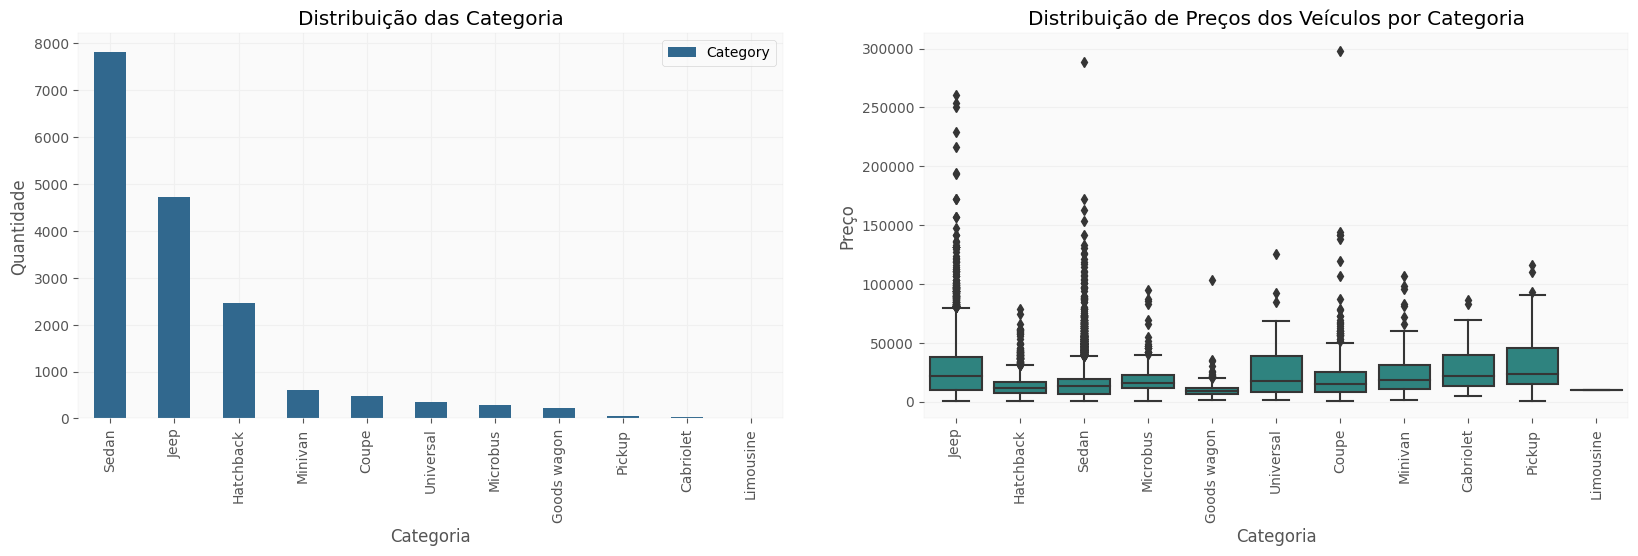

In [32]:
df['Category'].unique()

fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Category'].value_counts()

df_chart = df_chart.reset_index()
df_chart.plot.bar(x='index', y='Category', rot=90, ax=ax[0], color=coresViridis[2])
ax[0].set_title('Distribuição das Categoria')
ax[0].set_xlabel('Categoria')
ax[0].set_ylabel('Quantidade')

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Category', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços dos Veículos por Categoria')
ax[1].set_xlabel('Categoria')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

Sedans, Jeeps e Hatchbacks representam a grande maioria das categorias dos veículos. As diferenças entre as distribuições para cada classe da categoria pode ser encarada de forma positiva, visto que essa variabilidade pode ajudar os algoritmos a tomar decisões de forma mais fácil, tornando essa variável um possível bom preditor. Vamos ver mais sobre a categoria Limosine.

In [33]:
df[df['Category'] == 'Limousine']

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
8198,9408,0.0,MERCEDES-BENZ,Outros,1996,Limousine,No,CNG,2.3,310000,4.0,Manual,Rear,04-May,Left wheel,Silver,2,False


Como temos apenas um único registro (o que impossibilitaria um treinamento adequado), é interessante remové-lo do dataset, por ser um outlier de uma categoria muito específica e que dificilmente seria procurado pelos clientes da revendedora.

In [34]:
df = df[df['Category'] != 'Limousine']

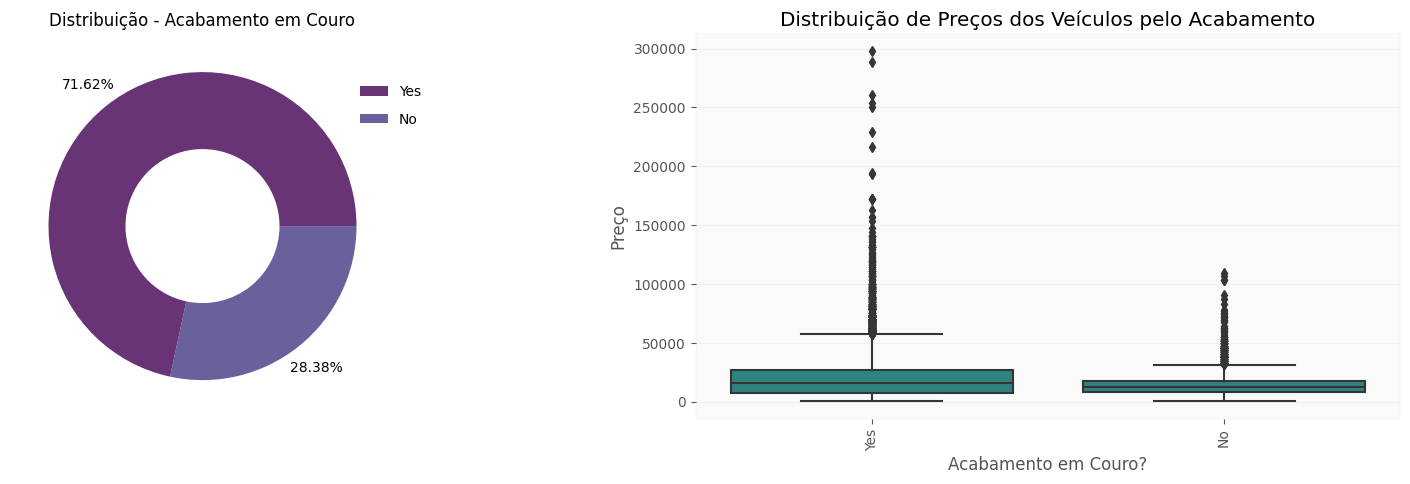

In [35]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Leather interior'].value_counts()
ax[0].pie(df_chart, autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição - Acabamento em Couro', fontsize=12)

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Leather interior', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços dos Veículos pelo Acabamento')
ax[1].set_xlabel('Acabamento em Couro?')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

É possível ver que veículos sem acabamento em couro geralmente expressam preços com um intervalo menor demonstrado pelo intervalo interquartil, ou seja, com uma variabilidade menor. Olhando para veículos com acabamento em couro, essa variabilidade o preço se torna mais alta. Essas diferenças nas distribuições podem ser positivas, possivelmente tornando essa variável uma boa preditora.

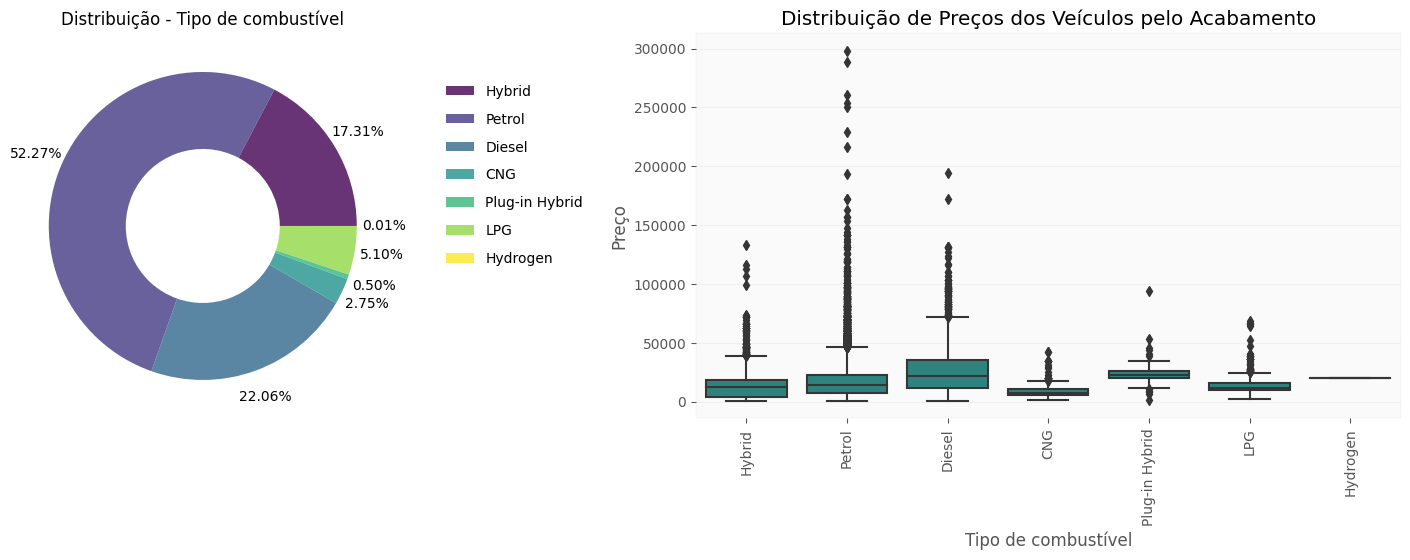

In [36]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Fuel type'].value_counts(sort=False)
ax[0].pie(df_chart, autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição - Tipo de combustível', fontsize=12)

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Fuel type', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços dos Veículos pelo Acabamento')
ax[1].set_xlabel('Tipo de combustível')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

As classes para o atributo Tipo de combustível estão bem desbalanceadas, porém as diferenças nas distribuições das classes em relação à variável dependente Preço, provavelmente tornam esse atributo um bom preditor. Vamos dar uma olhada nos veículos movidos a hidrogênio.

In [37]:
df[df['Fuel type'] == 'Hydrogen']

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
12900,20385,0.0,HYUNDAI,Outros,2012,Sedan,Yes,Hydrogen,2.4,116800,6.0,Tiptronic,Front,04-May,Left wheel,Grey,8,False


Como existe apenas um único modelo de veículo movido a Hidrogênio, acho que vale a pena remové-lo, por se tratar de um outlier e prejudicar o treinamento do modelo.

In [38]:
df = df[df['Fuel type'] != 'Hydrogen']

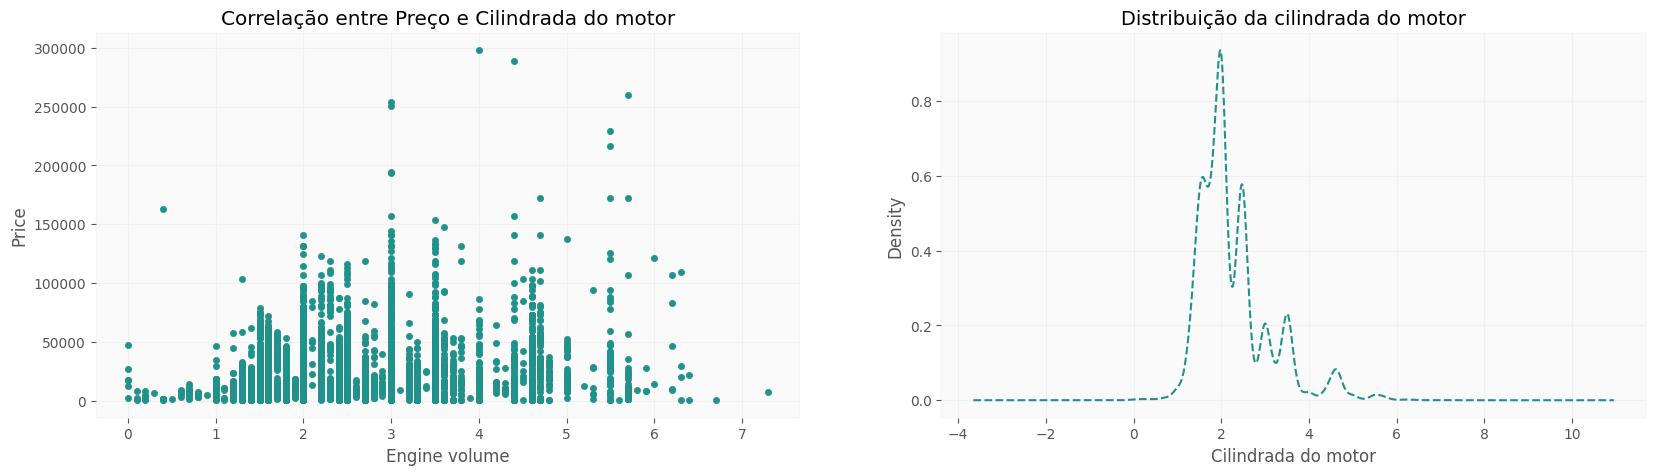

In [39]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df.plot.scatter(x='Engine volume', y='Price', ax=ax[0], color=coresViridis[3])
ax[0].set_title('Correlação entre Preço e Cilindrada do motor')

df['Engine volume'].plot.kde(ls='--', color=coresViridis[3], ax=ax[1])
ax[1].set_xlabel('Cilindrada do motor', fontsize=12)
ax[1].set_title('Distribuição da cilindrada do motor', fontsize=14)

plt.show()

A grande maioria dos veículos parece ter entre 1 e 3 cilindradas do motor. Porém não é possível tirar uma conclusão clara entre os preços levando em consideração essa variável, uma vez que a correlação parece ser fraca e não demonstra uma tendência clara.

Chama a atenção o outlier com cilindrada do motor de aproximadamente 7.4. Dificilmente se achariam carros usados com esta característica, então acredito ser interessante remove-lo do dataset também.


In [40]:
df = df[df['Engine volume'] < 7]

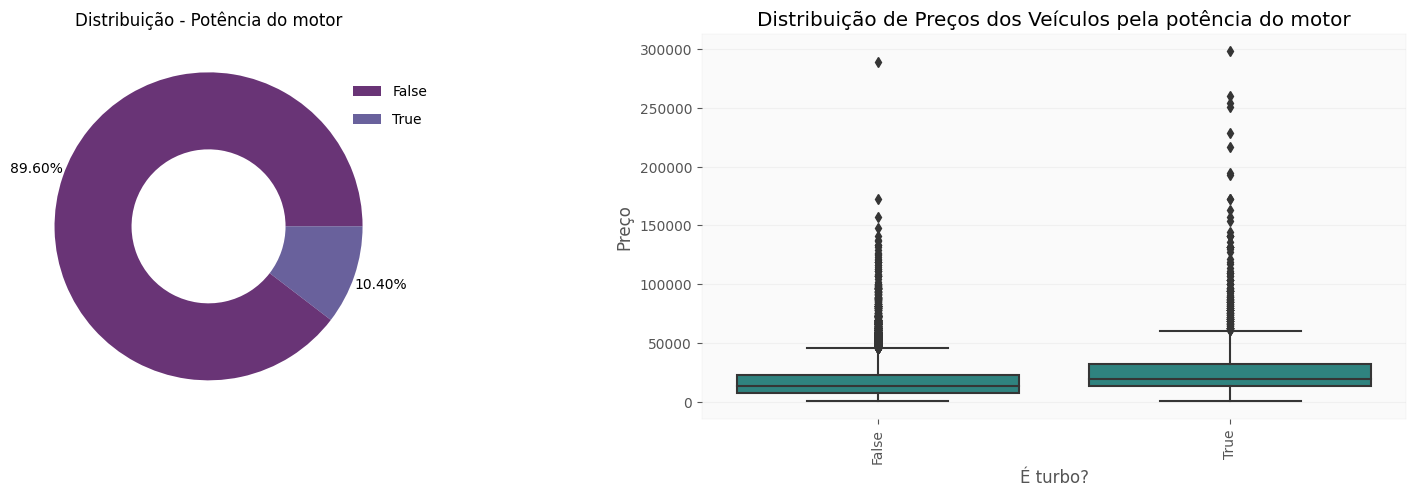

In [41]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Is Turbo'].value_counts()
ax[0].pie(df_chart, autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição - Potência do motor', fontsize=12)

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Is Turbo', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços dos Veículos pela potência do motor')
ax[1].set_xlabel('É turbo?')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

Pouco mais de 10% do dataset é composto por veículos com turbo compressor. As distribuições desta variável em relação à variável dependente preço, possuem uma leve diferença, o que pode beneficiar a generelização do modelo.

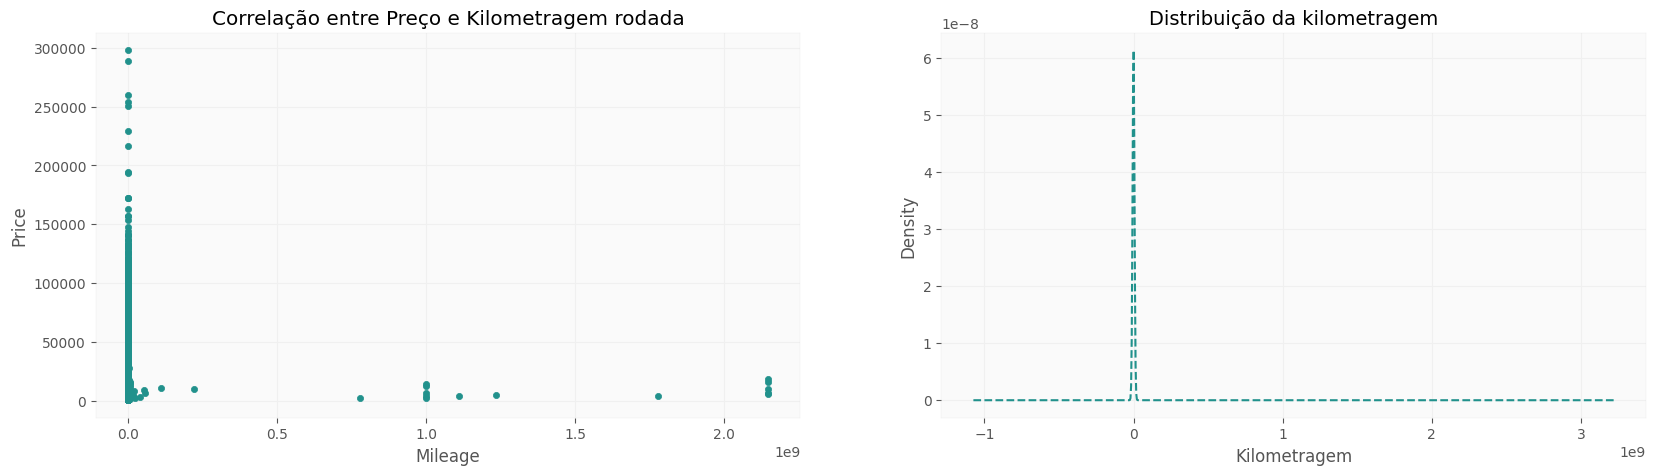

In [42]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df.plot.scatter(x='Mileage', y='Price', ax=ax[0], color=coresViridis[3])
ax[0].set_title('Correlação entre Preço e Kilometragem rodada')

df['Mileage'].plot.kde(ls='--', color=coresViridis[3], ax=ax[1])
ax[1].set_xlabel('Kilometragem', fontsize=12)
ax[1].set_title('Distribuição da kilometragem', fontsize=14)

plt.show()

Um motor não aguenta rodar mais do que 500 mil km, na melhor das hipóteses. Porém como o hodômetro do veículo esta associado ao motor original, mesmo que o motor seja trocado o hodômetro continuará a contagem, podendo atingir kilometragens muito acima dos 500 mil km como vemos nos outliers. A correlação parece ser fraca.

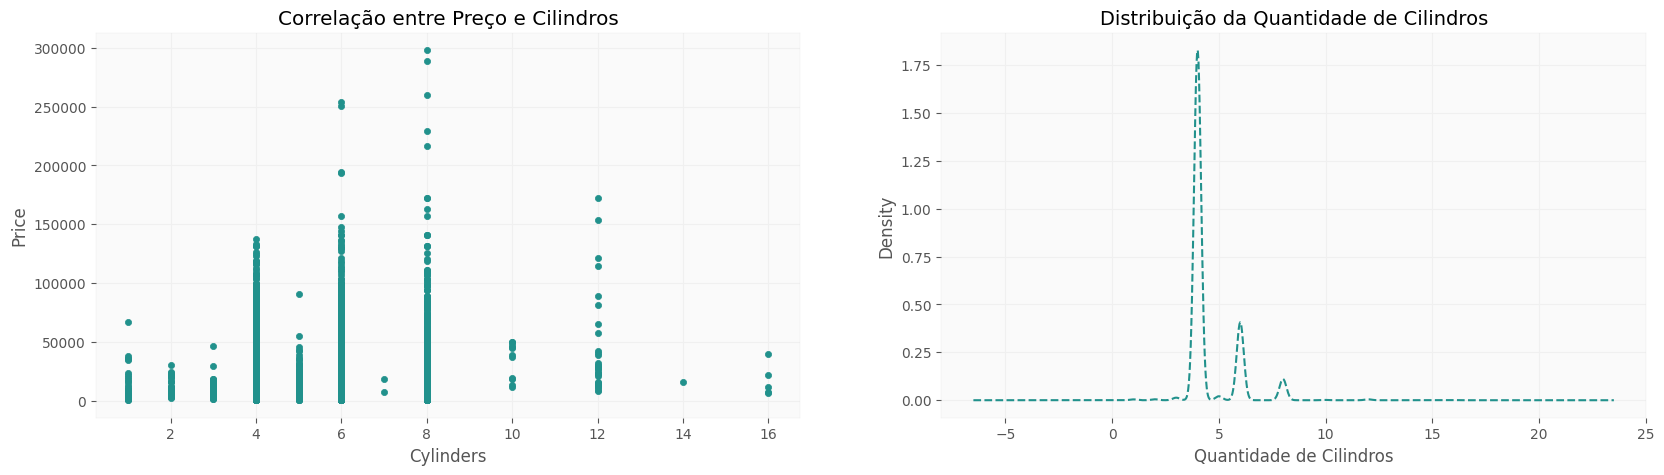

In [43]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df.plot.scatter(x='Cylinders', y='Price', ax=ax[0], color=coresViridis[3])
ax[0].set_title('Correlação entre Preço e Cilindros')

df['Cylinders'].plot.kde(ls='--', color=coresViridis[3], ax=ax[1])
ax[1].set_xlabel('Quantidade de Cilindros', fontsize=12)
ax[1].set_title('Distribuição da Quantidade de Cilindros', fontsize=14)

plt.show()

A grande maioria dos veículos parece ter 4 cilindros, seguido por uma quantidade menor de veículos com 6 cilindros. A quantidade de cilindros do motor não mostra uma tendência clara com a variável dependente preço.

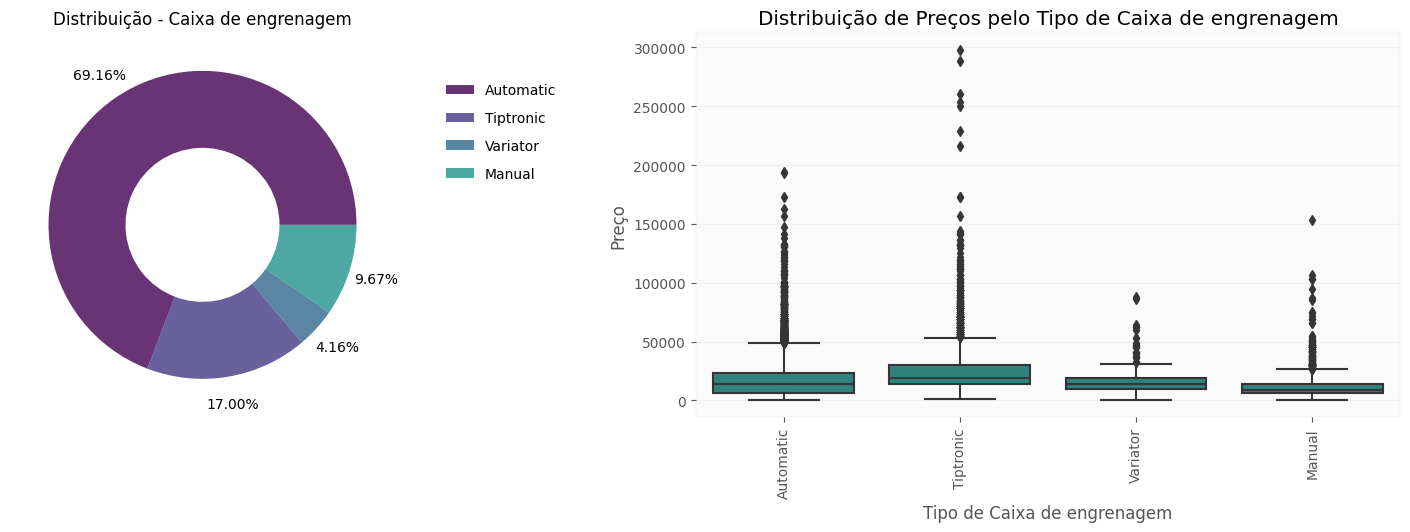

In [44]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Gear box type'].value_counts(sort=False)
ax[0].pie(df_chart, autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição - Caixa de engrenagem', fontsize=12)

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Gear box type', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços pelo Tipo de Caixa de engrenagem')
ax[1].set_xlabel('Tipo de Caixa de engrenagem')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

A grande maioria dos veículos possui transmissão automática. As distribuições para as classes automática e tiptronic apresenta algumas semelhanças entre si, apesar dos deslocamente interquartil, assim como as distribuições das classes variator e manual.

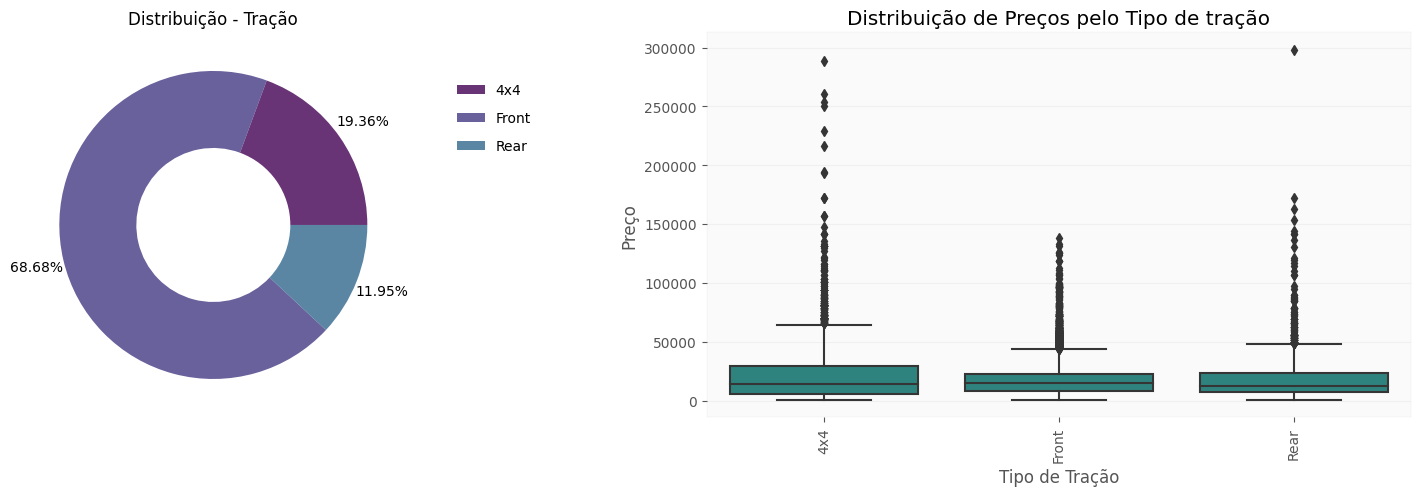

In [45]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Drive wheels'].value_counts(sort=False)
ax[0].pie(df_chart, autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição - Tração', fontsize=12)

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Drive wheels', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços pelo Tipo de tração')
ax[1].set_xlabel('Tipo de Tração')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

A grande maior parte dos veículos apresenta tração dianteira. Os veículos com tração 4x4 apresentam preços com uma varior variabilidade como pode ser visto no segundo gráfico, enquanto os veículos com tração dianteira e trazeira apresentam preços com menor variabilidade.

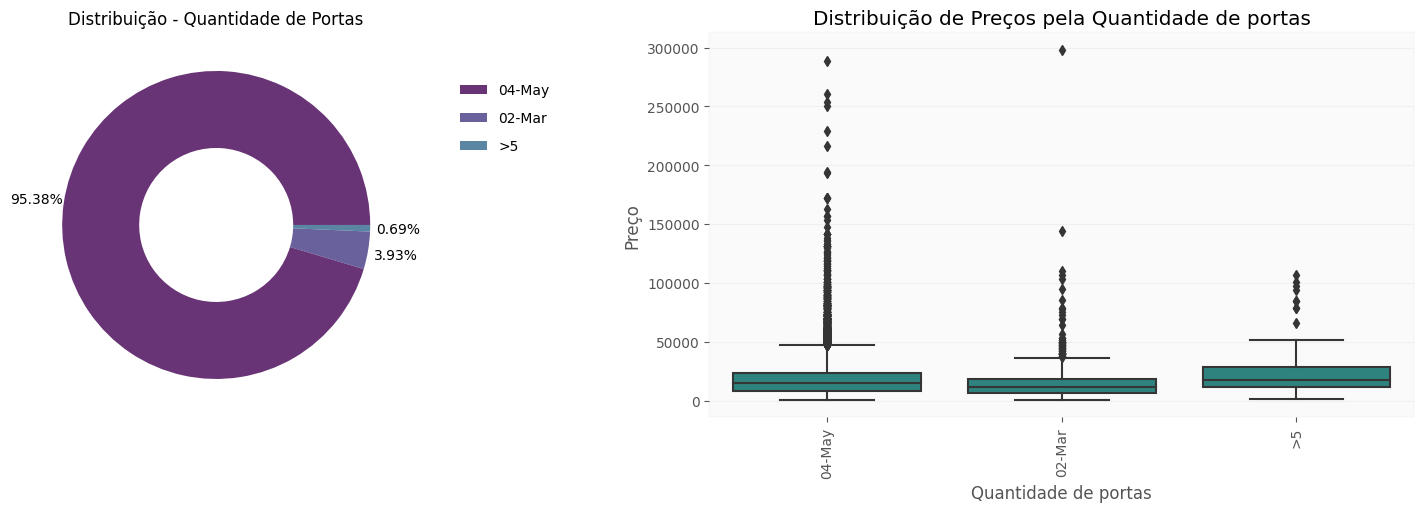

In [46]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Doors'].value_counts(sort=False)
ax[0].pie(df_chart, autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição - Quantidade de Portas', fontsize=12)

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Doors', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços pela Quantidade de portas')
ax[1].set_xlabel('Quantidade de portas')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

95% dos veículos possuem quatro portas. Veículos de 4 portas possuem uma distrubuição de preço com maior variabilidade se comparados com veículos de 2 portas. Porém essa variabilidade dos veículos de 4 portas é relativamente semelhante aos veículos de 5 portas, com algumas diferenças no deslocamento dos intervalos interquatis.

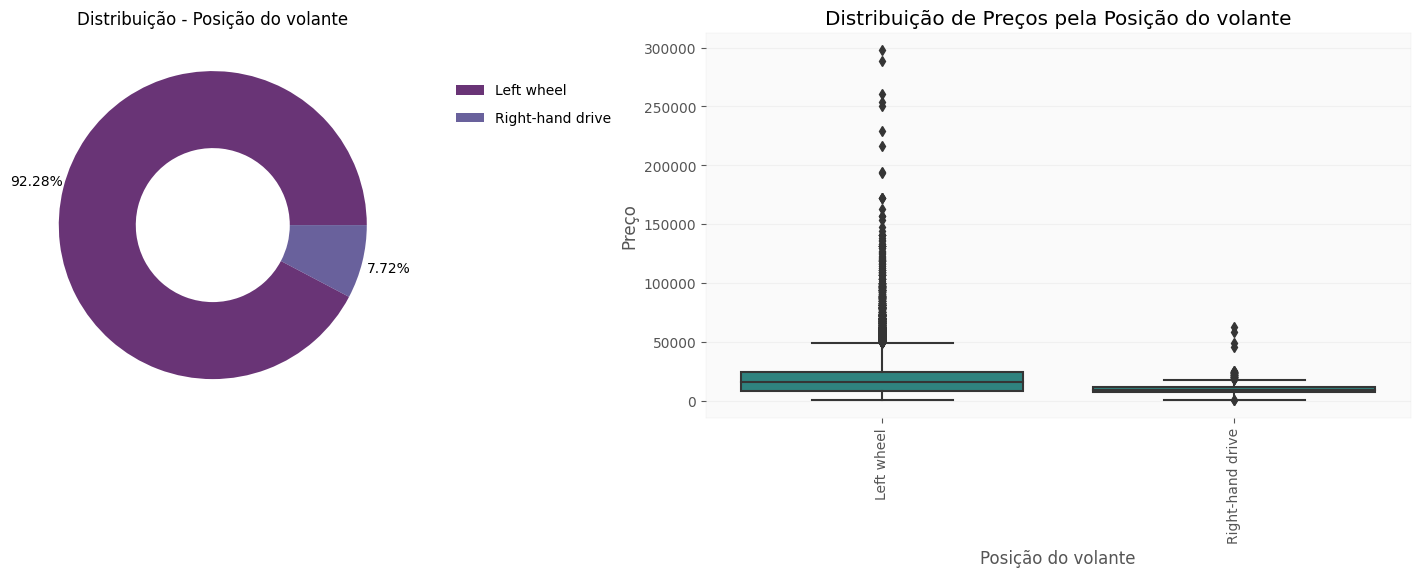

In [47]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Wheel'].value_counts(sort=False)
ax[0].pie(df_chart, autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição - Posição do volante', fontsize=12)

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Wheel', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços pela Posição do volante')
ax[1].set_xlabel('Posição do volante')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

Veículos com posicionamento do volante do lado direito representam apenas 7,72% do total e possuem uma menor variabilidade de preço se comparados com veículos com volando do lado esquerdo.

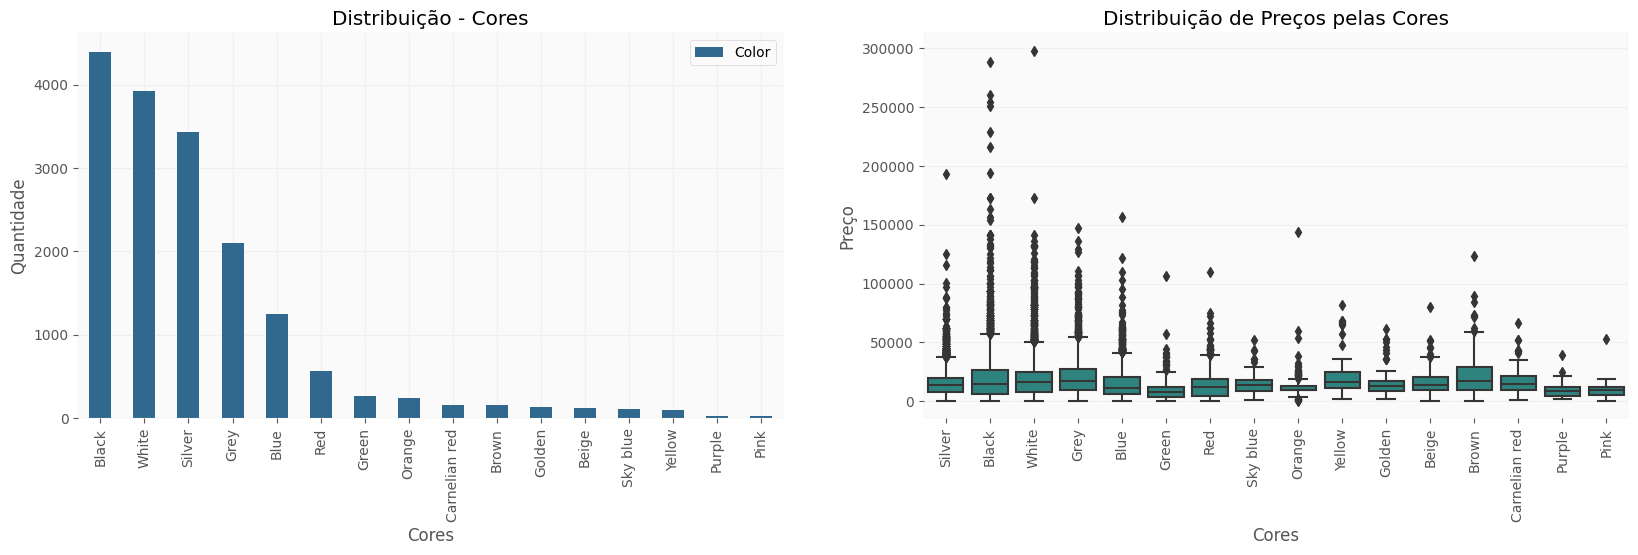

In [48]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Color'].value_counts()

df_chart = df_chart.reset_index()
df_chart.plot.bar(x='index', y='Color', rot=90, ax=ax[0], color=coresViridis[2])
ax[0].set_title('Distribuição - Cores')
ax[0].set_xlabel('Cores')
ax[0].set_ylabel('Quantidade')


# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Color', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços pelas Cores')
ax[1].set_xlabel('Cores')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

Temos que as cores mais comuns abrangem respectivamente preto, branco, prata, cinza, azul e vermelho. As cores apresentam pequenas diferenças na distribuição pela variável dependente preço.

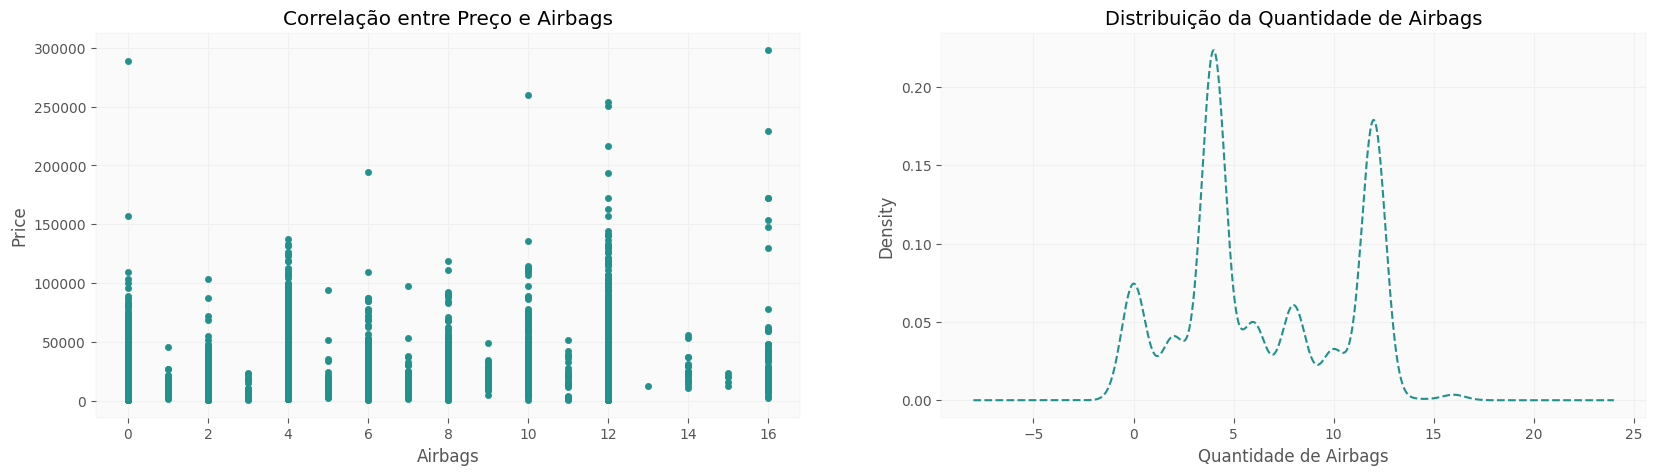

In [49]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df.plot.scatter(x='Airbags', y='Price', ax=ax[0], color=coresViridis[3])
ax[0].set_title('Correlação entre Preço e Airbags')

df['Airbags'].plot.kde(ls='--', color=coresViridis[3], ax=ax[1])
ax[1].set_xlabel('Quantidade de Airbags', fontsize=12)
ax[1].set_title('Distribuição da Quantidade de Airbags', fontsize=14)

plt.show()

Quase metade dos veículos possuem de 0 a 5 Airbags e aproximadamente. Não existem uma tendência clara em relação ao preço dos veículos com base na quantidade de Airbags.

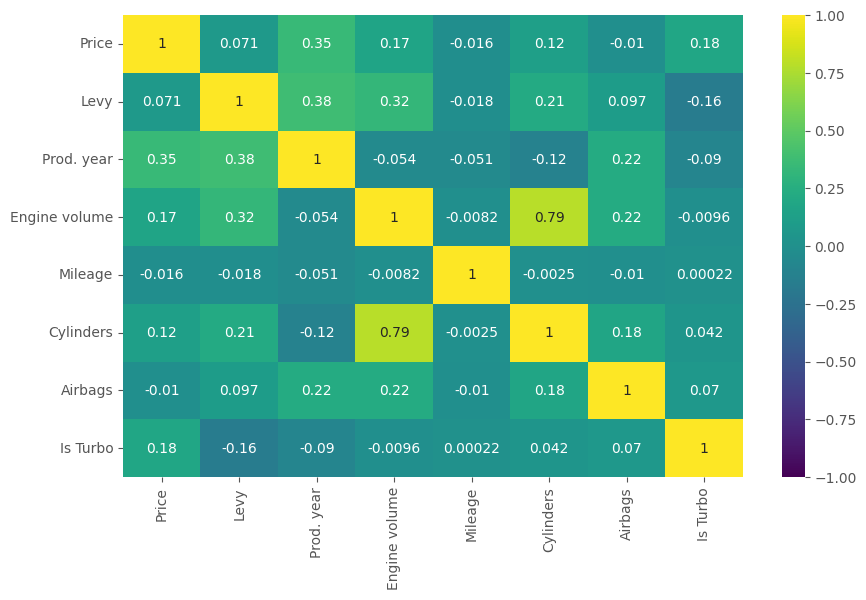

In [50]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', vmin=-1, vmax=1);

Todas as variáveis apresentam baixa correlação com com a variável preço. A variável que parece apresentar uma correlação pouco mais significativa é a variável relacionada ao ano de produção. A variável cilindrada do motor (Engine volume) apresenta uma alta correlação com a quantidade de cilindros do motor (Cylinders), o que faz bastante sentido, visto que ambas estão relacionadas ao desempenho do motor. Podemos considerar apenas a variável Engine Volume para a construção do modelo, visto que ela possui uma correlação um pouco maior com a variável dependente preço, se comparada à variável Cylinders.

In [51]:
df = df.drop('Cylinders', axis=1)

## 4. Pré-Processamento de dados

### 4.1 Codificação de variáveis categóricas

Utilizaremos a técnica do One-hot encoding para codicar as variáveis categóricas. Essa técnica é útil para permitir que algoritmos de ML possam trabalhar com dados categóricos, que normalmente não podem ser processados diretamente por esses algoritmos.

In [52]:
# Selecionando os atributos categóricos
attrs = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']

# Aplicando o one hot encoding aos atributos categóricos sem classes redundantes
selected_features = pd.get_dummies(df, prefix=attrs, columns=attrs, drop_first=True)
selected_features

,Price,Levy,Prod. year,Engine volume,Mileage,Airbags,Is Turbo,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_DAEWOO,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399.0,2010,3.5,186005,12,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16621,1018.0,2011,3.0,192000,8,False,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8467,0.0,2006,1.3,200000,2,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.0,2011,2.5,168966,0,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.0,2014,1.3,91901,4,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,1055.0,2013,3.5,107800,12,False,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19232,8467,0.0,1999,2.0,300000,5,True,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19233,15681,831.0,2011,2.4,161600,8,False,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,26108,836.0,2010,2.0,116365,4,False,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [53]:
# Aplicando o one hot encoding aos atributos categóricos sem excluir os reduntandes
all_features = pd.get_dummies(df, prefix=attrs, columns=attrs)
all_features

,Price,Levy,Prod. year,Engine volume,Mileage,Airbags,Is Turbo,Manufacturer_AUDI,Manufacturer_BMW,Manufacturer_CHEVROLET,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399.0,2010,3.5,186005,12,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16621,1018.0,2011,3.0,192000,8,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8467,0.0,2006,1.3,200000,2,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.0,2011,2.5,168966,0,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.0,2014,1.3,91901,4,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,1055.0,2013,3.5,107800,12,False,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19232,8467,0.0,1999,2.0,300000,5,True,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19233,15681,831.0,2011,2.4,161600,8,False,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,26108,836.0,2010,2.0,116365,4,False,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## 4.2 Seleção de recursos
Iremos utilizar o dataframe com todas as features geradas pelo one-hoting encoding para fazer a seleção de features.

In [54]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = all_features.values
X = array[:,1:177] # atributos
y = array[:,0] # classe (target)

In [55]:
y = y.astype(float)

In [56]:
# Criação do modelo para seleção de atributos
# Considerando que temos 10 atributos categoricos, podemos remover 10 atributos
selector = SelectKBest(f_classif, k = 167)
X_new = selector.fit(X, y)

column_names = all_features.columns[1:177]
importance_values = X_new.scores_

matrix = list(zip(column_names, importance_values))
df_import = pd.DataFrame(matrix, columns=['Atributos', 'Importancia'])

In [57]:
df_import = df_import.sort_values('Importancia', ascending=False)
df_import.head()

,Atributos,Importancia
67,Model_Explorer,15.542713
110,Model_Santa FE,12.050336
77,Model_Genesis,10.667830
80,Model_H1,10.640579
23,Manufacturer_SSANGYONG,10.587584


In [58]:
df_import.tail()

,Atributos,Importancia
10,Manufacturer_DODGE,0.225107
169,Color_Pink,0.214939
55,Model_Combo,0.211139
63,Model_E 320,0.206629
57,Model_Corolla,0.189834


É possível ver acima os atributos com maior e menor importancia para o modelo  respectivamente como: **Model_Explorer** e **Model_Corolla**.

In [59]:
attrs_to_delete = []

for attr in attrs:
  df_sample = df_import[df_import['Atributos'].str.contains(attr)].sort_values('Importancia')
  attr_ = df_sample.iloc[0]['Atributos']
  score_ = df_sample.iloc[0]['Importancia']
  print('Atributo: {} ==== Importancia: {}'.format(attr_, score_))
  attrs_to_delete.append(attr_)

Atributo: Manufacturer_DODGE ==== Importancia: 0.22510732631902064
Atributo: Model_Corolla ==== Importancia: 0.18983389648416527
Atributo: Category_Microbus ==== Importancia: 0.7130033128347375
Atributo: Leather interior_Yes ==== Importancia: 2.955073043786567
Atributo: Fuel type_Plug-in Hybrid ==== Importancia: 0.4551102122475425
Atributo: Gear box type_Variator ==== Importancia: 0.6254201445122332
Atributo: Drive wheels_Rear ==== Importancia: 1.0569010295323549
Atributo: Doors_02-Mar ==== Importancia: 0.7130323218394039
Atributo: Wheel_Left wheel ==== Importancia: 1.8337776770113925
Atributo: Color_Pink ==== Importancia: 0.21493876189175337


Acima podemos ver a lista dos atributos que podemos deletar para que eles causem o menor impacto possível na modelagem, um vez que a remoção deles foi selecionada com base em sua importancia para o modelo.

In [60]:
important_features = all_features.drop(columns=attrs_to_delete)

## 4.3 Separação em conjunto de treino e conjunto de teste

Agora temos três dataframes para poder treinar o modelo e realizar uma comparação.

1. selected_fetaures: dataframe criado pelo metodo do one-hot encoding onde é omitida a primeira categoria da coluna.
2. all_features: dataframe criado pelo metodo do one-hot encoding onde nenhuma categoria de coluna é omitida.
3. important_features: dataframe criado pelo metodo do one-hot encoding onde as categorias com menor importancia foram omitidas.

In [61]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset gerado pelo one-hot encoding)
X_1 = selected_features.values[:,1:]
X_2 = all_features.values[:,1:]
X_3 = important_features.values[:,1:]
y = df['Price'].values[:]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y,
    test_size=test_size, random_state=seed)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y,
    test_size=test_size, random_state=seed)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y,
    test_size=test_size, random_state=seed)

## 4.4 Construção de pipelines

Abaixo fazemos a construção dos pipelines para realizar processos de normalização e padronização antes do treinamento do modelos. O treinamento é realizado utilizando validação cruzada com 10 partições onde usamos a métrica R² para medir a qualidade de cada treinamento da partição. Isso nos gera um total de 10 valores diferentes baseados na métrica R² para cada algoritmo com a combinação de tratamento dos dados (normalização ou padronização), ao final plotamos um gráfico de box-plot com a distribuição dos 10 treinamentos realizados para cada algoritmo, para entendermos qual gera os melhores resultados para efeito de comparação.

Lembrando que quanto mais próximo de 1 melhor o ajuste do modelos aos dados.

LR-padr: 0.439 (0.030)
RIDGE-padr: 0.438 (0.028)
LASSO-padr: 0.440 (0.029)
KNN-padr: 0.518 (0.050)
CART-padr: 0.594 (0.076)
RFR-padr: 0.775 (0.029)
GBR-padr: 0.630 (0.038)
LR-norm: 0.440 (0.033)
RIDGE-norm: 0.438 (0.021)
LASSO-norm: 0.440 (0.036)
KNN-norm: 0.536 (0.056)
CART-norm: 0.601 (0.081)
RFR-norm: 0.774 (0.029)
GBR-norm: 0.633 (0.037)


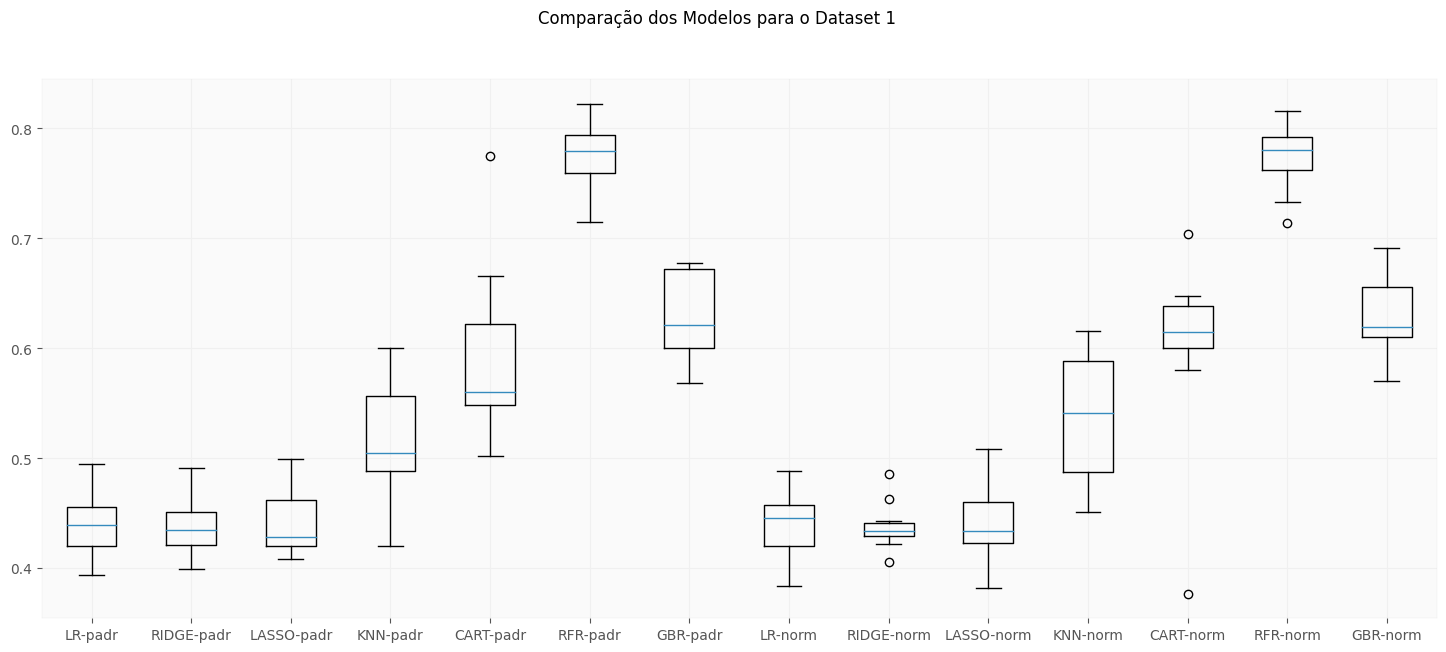

In [62]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []
num_particoes = 10
scoring = 'r2'

lr = ('LR', LinearRegression())
ridge = ('Ridge', Ridge())
lasso = ('Lasso', Lasso())
knn = ('KNN', KNeighborsRegressor())
cart = ('CART', DecisionTreeRegressor())
rfr = ('RFR', RandomForestRegressor())
gbr = ('GBR', GradientBoostingRegressor())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, lr])))
pipelines.append(('RIDGE-padr', Pipeline([standard_scaler, ridge])))
pipelines.append(('LASSO-padr', Pipeline([standard_scaler, lasso])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('RFR-padr', Pipeline([standard_scaler, rfr])))
pipelines.append(('GBR-padr', Pipeline([standard_scaler, gbr])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, lr])))
pipelines.append(('RIDGE-norm', Pipeline([min_max_scaler, ridge])))
pipelines.append(('LASSO-norm', Pipeline([min_max_scaler, lasso])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('RFR-norm', Pipeline([min_max_scaler, rfr])))
pipelines.append(('GBR-norm', Pipeline([min_max_scaler, gbr])))

kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True)

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train_1, y_train_1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(18, 7))
fig.suptitle('Comparação dos Modelos para o Dataset 1')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR-padr: 0.438 (0.028)
RIDGE-padr: 0.440 (0.039)
LASSO-padr: 0.438 (0.025)
KNN-padr: 0.524 (0.040)
CART-padr: 0.647 (0.060)
RFR-padr: 0.778 (0.028)
GBR-padr: 0.635 (0.038)
LR-norm: 0.438 (0.037)
RIDGE-norm: 0.439 (0.029)
LASSO-norm: 0.440 (0.035)
KNN-norm: 0.553 (0.027)
CART-norm: 0.614 (0.063)
RFR-norm: 0.783 (0.034)
GBR-norm: 0.637 (0.036)


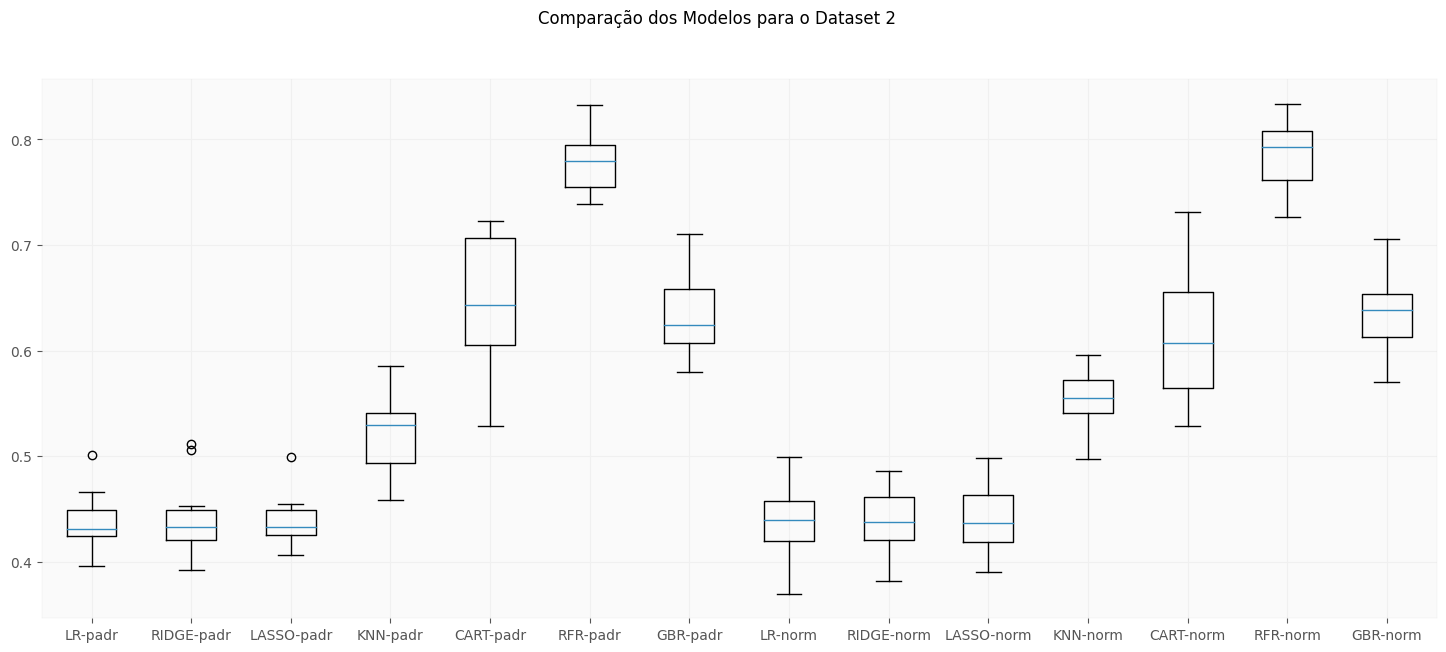

In [63]:
# Resetando as variáveis
results = []
names = []

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train_2, y_train_2, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(18, 7))
fig.suptitle('Comparação dos Modelos para o Dataset 2')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR-padr: 0.438 (0.031)
RIDGE-padr: 0.439 (0.025)
LASSO-padr: 0.438 (0.038)
KNN-padr: 0.530 (0.050)
CART-padr: 0.610 (0.072)
RFR-padr: 0.780 (0.032)
GBR-padr: 0.638 (0.041)
LR-norm: 0.437 (0.036)
RIDGE-norm: 0.438 (0.028)
LASSO-norm: 0.438 (0.027)
KNN-norm: 0.540 (0.049)
CART-norm: 0.578 (0.065)
RFR-norm: 0.775 (0.040)
GBR-norm: 0.636 (0.049)


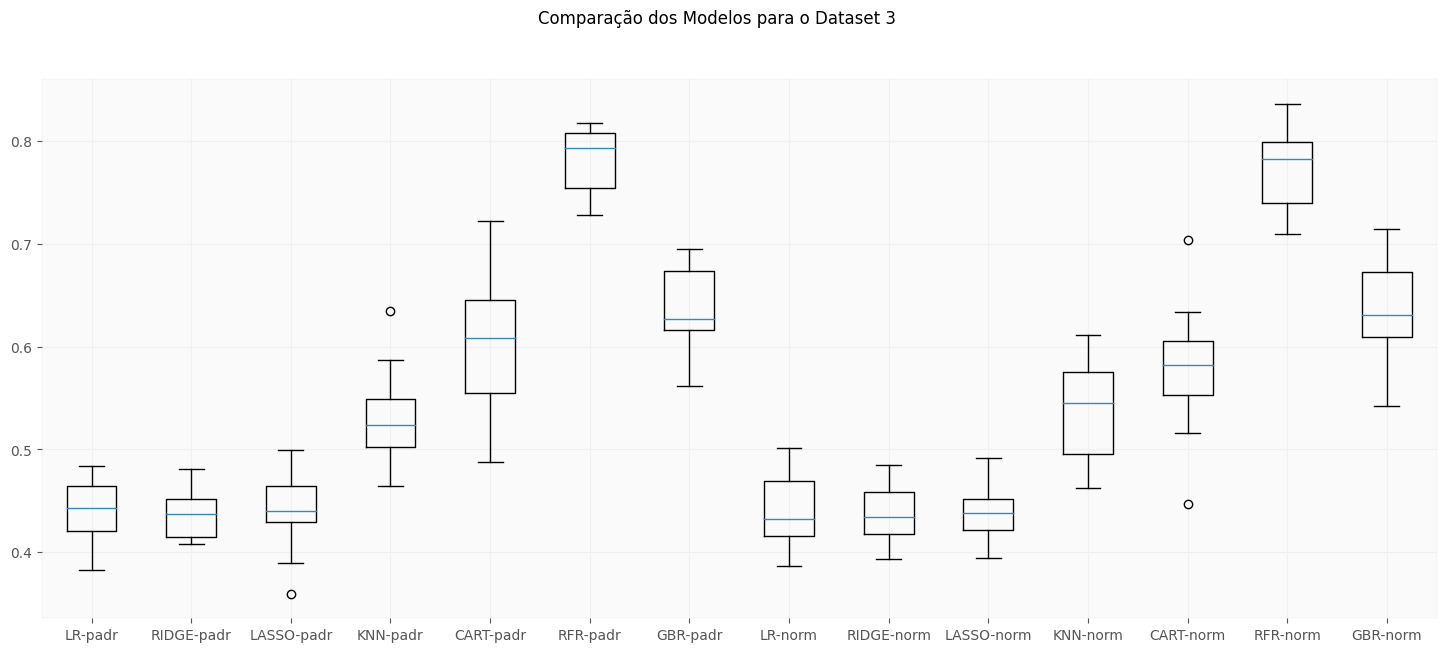

In [64]:
# Resetando as variáveis
results = []
names = []

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train_3, y_train_3, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(18, 7))
fig.suptitle('Comparação dos Modelos para o Dataset 3')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

É evidente o destaque que o algoritmo RandomForestRegressor teve frente aos demais. O treinamento com a padronização se saiu melhor por uma casa decimal e por não ter outliers em comparação ao modelo treinado com normalização.

## 4.5 Otimização dos hiperparâmetros

Para realizar a otimização dos hiperparâmetros, iremos utilizar o dataset 3 que passou por seleção de features através da importância dos atributos.

In [65]:
# Tuning do Random Forest Regressor

pipelines = []

# Definindo os componentes do pipeline
rfr = ('RFR', RandomForestRegressor())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('RFR-padr', Pipeline(steps=[standard_scaler, rfr])))
pipelines.append(('RFR-norm', Pipeline(steps=[min_max_scaler, rfr])))
pipelines.append(('RFR-all', Pipeline(steps=[standard_scaler, min_max_scaler, rfr])))

param_grid = {
    'RFR__n_estimators': [50, 75, 100, 125],
    'RFR__max_depth': [3, 5, 10]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train_3, y_train_3)
    # imprime a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Modelo: RFR-padr - Melhor: 0.726597 usando {'RFR__max_depth': 10, 'RFR__n_estimators': 100}
Modelo: RFR-norm - Melhor: 0.730959 usando {'RFR__max_depth': 10, 'RFR__n_estimators': 75}
Modelo: RFR-all - Melhor: 0.727305 usando {'RFR__max_depth': 10, 'RFR__n_estimators': 125}


## 5. Finalização do Modelo

In [72]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train_3) # ajuste do scaler com o conjunto de treino
rescaledTrainX = scaler.transform(X_train_3) # aplicação da padronização no conjunto de treino
rescaledTestX = scaler.transform(X_test_3) # aplicação da padronização no conjunto de teste

# Treinamento do modelo
model = RandomForestRegressor(n_estimators=75, max_depth=10)
model.fit(rescaledTrainX, y_train_3)

# Fazer previsões nos dados de treinamento e de teste
y_train_pred = model.predict(rescaledTrainX)
y_test_pred = model.predict(rescaledTestX)

# Estimativa da R² e MSE nos conjuntos de treino e teste
print('Estimativa da R² no conjunto de Treino')
print('R²: ', r2_score(y_train_3, y_train_pred))
print('\n')

print('Estimativa da R² no conjunto de Teste')
print('R²: ', r2_score(y_test_3, y_test_pred))

Estimativa da R² no conjunto de Treino
R²:  0.8547293588793269


Estimativa da R² no conjunto de Teste
R²:  0.7280864423265228


Acima vemos que o valor de R² para o teste esta pouco abaixo do valor de R² de treino, o que nos diz que o modelo estatístico não apresenta overfiting ou underfiting. O R² igual a 0,728 significa que o modelo estatístico é capaz de explicar aproximadamente 72,8% da variação total dos dados, o que pode ser considerada uma métrica razoavelmente alta e indica um om ajuste do modelo aos dados. Para os fins aos quais o modelo é proposto, é possível se ter uma ideia do preço do veículo usado com base nas variáveis independentes usadas.